# THE SPARKS FOUNDATION
# Graduate Rotational Internship Program
## - Rohit Bari

## Task 1 :-
## Prediction using Supervised ML
### -Predict the percentage of a student based on the no. of study hours.

### This is a simple linear regression task as it involves just 2 variables.

### To Predict:
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


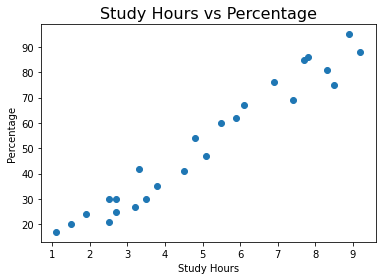

In [7]:
#%matplotlib inline

plt.title('Study Hours vs Percentage', fontsize=16)  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage') 

plt.scatter(data.Hours,data.Scores)

In [8]:
X = np.array(data.iloc[:, :-1].values)  
y = np.array(data.iloc[:, 1].values)

In [9]:
from sklearn.model_selection import train_test_split

#Split ;20% test 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train,y_train

(array([[3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
        54, 95, 41], dtype=int64))

In [10]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

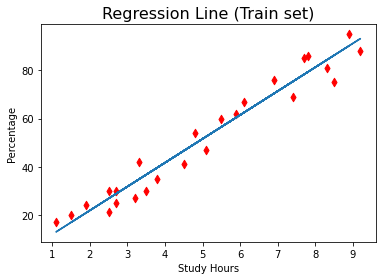

In [11]:
line = reg.coef_ * X + reg.intercept_

plt.title('Regression Line (Train set)', fontsize=16)  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage') 
plt.scatter(X, y,color='red',marker='d')
plt.plot(X, line)

plt.show()

In [12]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
y_pred = reg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
df_test = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_test

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


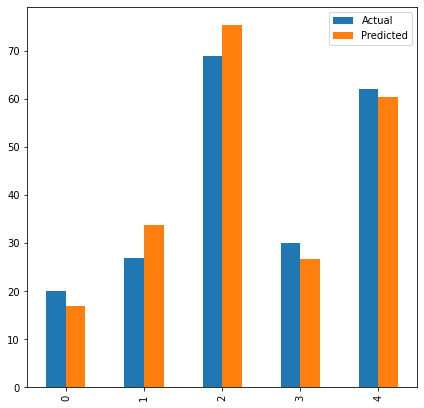

In [15]:
df_test.plot(kind='bar', figsize = (7,7))
plt.show()

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


In [17]:
hours = 9.25
pred = reg.predict([[hours]])
print("For '9.25' number of hours study; Predicted Score is '{}'".format(pred[0]))

For '9.25' number of hours study; Predicted Score is '93.69173248737535'
